In [3]:
# This model uses party as the target variable/label

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import io
import numpy as np


## Import Data
# Use categories: state,zipcode,ethnicity,income,age,sex,education,marriage,childen,party
# Data goes into 'X', labels go into 'y'
from google.colab import files
uploaded = files.upload()


# raw data
# Done using #3, but proportional votes below
#X = pd.read_csv(io.BytesIO(uploaded['IA_synthetic_USCensusDist_full_data_Output.csv']))

# anonymized data
X = pd.read_csv(io.BytesIO(uploaded['k_3_anon_IA_USCensusDist_data_full.csv']))

X = X.drop('state', axis=1)
#X = X.drop([8, 186254], axis=0)

Saving k_3_anon_IA_USCensusDist_data_full.csv to k_3_anon_IA_USCensusDist_data_full.csv


In [4]:
## Debugging panel :)

'''
print(X.head())
print()
print(np.any(np.isnan(X)))
print()
test = np.where(np.isnan(X))
print()
print(len(test))
print(test)
print()
print(X.loc[8])
print()
print(X.loc[186254])
print()
print(X.loc[2])
'''

print("NaN?", np.any(np.isnan(X)))
print(np.where(np.isnan(X)))
print()
print("All Finite?", np.all(np.isfinite(X)))
print(np.where(np.isfinite(X)))



#X = X.drop([8, 186254], axis=0)

NaN? False
(array([], dtype=int64), array([], dtype=int64))

All Finite? True
(array([    0,     0,     0, ..., 64192, 64192, 64192]), array([0, 1, 2, ..., 6, 7, 8]))


In [0]:
#s = pd.Series(list('abca'))
#pd.get_dummies(s)
#print(s)
#df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
#...                    'C': [1, 2, 3]})
#print(df)
#pd.get_dummies(df)
#print(type(X))
#new = pd.get_dummies(X, columns=['zipcode', 'ethnicity', 'income', 'age', 'sex', 'education', 'marriage', 'children'])
#print(X)

        zipcode  ethnicity  income  age  ...  education  marriage  children  party
0         50466          5       1   48  ...          3         3         2    0.0
1         50466          5       1   34  ...          3         0         1    1.0
2         52136          1       1   43  ...          3         1         1    0.0
3         50444          1       1   69  ...          2         1         1    2.0
4         52101          1       1   60  ...          5         1         3    2.0
...         ...        ...     ...  ...  ...        ...       ...       ...    ...
526439    52405          1       1   40  ...          3         2         1    1.0
526440    52405          1       3   40  ...          3         1         3    0.0
526441    52405          5       0   26  ...          5         2         1    0.0
526442    52405          3       0   32  ...          5         3         3    1.0
526443    52405          1       1   24  ...          5         0         4    2.0

[52

In [11]:
# USE THIS FRAME FOR INDIVIDUAL MODEL TESTING
# Split, model, fit


## Pull registered party off data to use as labels
# ??? dem=0, rep=1, lib=2 ???
#y = X['party']
#X = X.drop('party', 1)
#X = X.drop('zipcode', 1)

# Binarize
new = pd.get_dummies(X, columns=['zipcode', 'ethnicity', 'income', 'age', 'sex', 'education', 'marriage', 'children'])

## Split data into train, dev, test; 70% train, 15% dev, 15% test
X_train, X_test, y_train, y_test = train_test_split(new, y, test_size=0.3, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)


## Make decision tree
model = tree.DecisionTreeClassifier(criterion='gini')

## Fit the data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
# Use this frame for DEV data only!!!

## Predict
y_d_predict = model.predict(X_dev)

## Test how accurate we are
print(accuracy_score(y_dev, y_d_predict))

## Check confusion matrix
print(confusion_matrix(y_dev, y_d_predict))

## Print out the classes
print(model.n_features_)
print()
print(model.feature_importances_)


0.43119742444698306
[[3085  907  421]
 [1852  784  223]
 [1624  450  283]]
274

[1.37420868e-03 0.00000000e+00 1.21957556e-04 5.55188418e-04
 0.00000000e+00 2.09691081e-04 0.00000000e+00 1.83799267e-03
 8.86446888e-03 1.08743798e-03 0.00000000e+00 1.24246623e-03
 2.14424474e-03 1.06545454e-03 2.41695072e-04 2.13634282e-03
 2.82216691e-03 2.16944674e-03 3.25299226e-03 1.46052425e-03
 0.00000000e+00 0.00000000e+00 1.45783690e-03 7.59796941e-04
 1.09048614e-03 3.76289369e-03 3.13695624e-04 0.00000000e+00
 4.87888248e-05 1.74783100e-03 1.41597866e-04 1.12549917e-03
 1.09653066e-03 1.30741869e-03 9.65533486e-04 6.51056897e-04
 1.78175388e-04 4.43933111e-04 2.00017764e-03 0.00000000e+00
 3.89717403e-03 7.34039845e-04 4.08487737e-03 2.62302074e-04
 2.35114245e-03 0.00000000e+00 2.92363319e-03 2.16055359e-03
 0.00000000e+00 0.00000000e+00 2.36952165e-03 1.05363164e-03
 7.61090265e-04 1.31327065e-03 4.96305705e-03 2.35283744e-04
 4.18940169e-03 3.51190379e-04 2.52009049e-03 1.65523355e-03
 3.09

In [29]:
# Printing / Display
from graphviz import Source
from IPython.display import SVG
from IPython.display import Image
from google.colab import files


## Build Graph
print("Making Graph ...")
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=new.columns))
print("Done")
print()

## Convert to png format
print("Converting to png ...")
png_bytes = graph.pipe(format='png')
print("Done")
print()

## Write that png to some file pointer
print("Writing png ...")
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)
print("Done")
print()

Making Graph ...
Done

Converting to png ...


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.209707 to fit


Done

Writing png ...
Done



In [42]:
## Display it
from IPython import Image, display
import io
import warnings
from google.colab.patches import cv2_imshow
import cv2
from sklearn import tree


tree.export_graphviz(model)
#raph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf("output/tree-vis.pdf")


#warnings.simplefilter('ignore', Image.DecompressionBombWarning)

#files.download(png_bytes)


#image_data = png_bytes # byte values of the image
#image = Image.open(io.BytesIO(image_data))
#image.show()
#img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
#cv2_imshow(img)

## Save it
#print(image)
#files.download(image)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[263] <= 0.5\\ngini = 0.642\\nsamples = 44935\\nvalue = [20577, 13361, 10997]"] ;\n1 [label="X[265] <= 0.5\\ngini = 0.653\\nsamples = 28646\\nvalue = [12173, 8810, 7663]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[96] <= 0.5\\ngini = 0.65\\nsamples = 11841\\nvalue = [4851, 4235, 2755]"] ;\n1 -> 2 ;\n3 [label="X[255] <= 0.5\\ngini = 0.651\\nsamples = 11554\\nvalue = [4780, 4043, 2731]"] ;\n2 -> 3 ;\n4 [label="X[98] <= 0.5\\ngini = 0.65\\nsamples = 11139\\nvalue = [4652, 3829, 2658]"] ;\n3 -> 4 ;\n5 [label="X[256] <= 0.5\\ngini = 0.651\\nsamples = 10487\\nvalue = [4415, 3521, 2551]"] ;\n4 -> 5 ;\n6 [label="X[254] <= 0.5\\ngini = 0.652\\nsamples = 9903\\nvalue = [4177, 3261, 2465]"] ;\n5 -> 6 ;\n7 [label="X[99] <= 0.5\\ngini = 0.651\\nsamples = 9249\\nvalue = [3955, 2980, 2314]"] ;\n6 -> 7 ;\n8 [label="X[95] <= 0.5\\ngini = 0.65\\nsamples = 9004\\nvalue = [3881, 2862, 2261]"] ;\n7 -> 8 ;\n9 [label="X[100] 

In [0]:

## USE ONLY FOR MANY TESTS IN A ROW
## GO BELOW FOR INDIVIDUAL TESTING!!!

## Make Labels; randomly place 0 and 1
#y = np.random.randint(2, size=X.shape[0])

## Assign labels proportionally correct, but possibly on incorrect individuals
# dem=0, rep=1, lib=2
p_vote = [0.797, 0.198, 0.005]
y = np.random.choice(len(p_vote), X.shape[0], p=p_vote)


# Nudge the data toward party preference; see effects
'''
print(X.iloc[31])
print()

print(X.education[31])
print()
print(X.party[31])
'''

nudges = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
accuracies = list()

for nudge_factor in nudges:
  print("We are on nudge", nudge_factor)
  print()
  
  # Adjust labels for synthetic data
  for i in range(1, X.shape[0]):
    reg = int(X.party[i])
    vote = int(y[i])
    #print("Row", i, "has been processed.", "Party:", reg)
    if reg == vote:
      continue
    else:
      p = np.random.random_sample()
      if p >= nudge_factor:
        y[i] = reg
        #print("change!")

  ## Split data into train, dev, test; X = data; y = matching labels
  # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
  X_train, X_dev, X_test = np.split(X.sample(frac=1), [int(.75*len(X)), int(.85*len(X)), int(len(X))])
  y_train, y_dev, y_test = np.split(y.sample(frac=1), [int(.75*len(y)), int(.85*len(y)), int(len(y))])


  ## Make decision tree
  model = tree.DecisionTreeClassifier()

  ## Fit the data
  model.fit(X_train, y_train)

  ## Predict
  y_predict = model.predict(X_test)

  ## Test how accurate we are
  #print(accuracy_score(y_test, y_predict))
  accuracies.append(accuracy_score(y_test, y_predict))

  ## Check confusion matrix
  #print(confusion_matrix(y_test, y_predict))

  # Vizualize?


  # Apply Privacy Eng; and retest





We are on nudge 0.0

We are on nudge 0.1

We are on nudge 0.2

We are on nudge 0.3

We are on nudge 0.4

We are on nudge 0.5

We are on nudge 0.6

We are on nudge 0.7

We are on nudge 0.8

We are on nudge 0.9

We are on nudge 1.0



[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


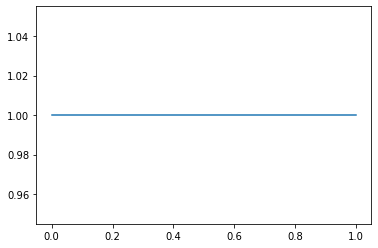

In [0]:
import matplotlib.pyplot as plt
plt.plot(nudges, accuracies)
print(accuracies)